In [47]:
from display import *
from obspy import read,UTCDateTime
import pandas as pd
import matplotlib.dates as md
from geographiclib.geodesic import Geodesic
from utility import *

In [48]:
station = 'YUS'
dir_summary=f'summaries/Yushu/20100413/{station}/'
tag='example_yushu'
wave_path = f'./data/Yushu/SAC/20100413/*{station}*SAC'

In [49]:
def dist_to_point(pd_ls_cata, center_lat, center_lon):
    dist = []
    for i in range(len(pd_ls_cata)):
        event_lat = pd_ls_cata.iloc[i].lat
        event_lon = pd_ls_cata.iloc[i].lon
        distance = Geodesic.WGS84.Inverse(center_lat, center_lon, event_lat, event_lon)['a12'] * 111
        dist.append(distance)
    pd_ls_cata["dist_to_sta"] = dist
    return pd_ls_cata

In [50]:
def make_cumus(event_times):
    x = event_times
    c = [1] * len(x)
    y = [sum(c[0:x:1]) for x in range(len(x)+1)]
    return x, y

In [51]:
def plot_loss(dir_summary, tag, epoch):
    cluster_loss = pd.read_csv(f"{dir_summary}/{tag}/loss_clustering.txt")
    reconstruct_loss = pd.read_csv(f"{dir_summary}/{tag}/loss_reconstruction.txt")
    
    # plot
    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(7,5))
    fig.subplots_adjust(hspace=0.5)
    ax1.plot(cluster_loss.index,cluster_loss["0"],color='black',linewidth=1)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.set_title('Clustering loss')
    ax1.grid(True)
    ax1.axvline(x=epoch,color='red',alpha=0.5)

    ax2.plot(reconstruct_loss.index,reconstruct_loss["0"],color='#e54e35',linewidth=1)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    ax2.set_title('Reconstruction loss')
    ax2.axvline(x=epoch,color='red',alpha=0.5)
    ax2.grid(True)
    
    plt.show()

In [52]:
epoch = 65
show_detections(dir_summary, tag, epoch=epoch, dir_output=None,save='detections_{:05d}.png', norm=None)

/home/lchuang/projects/scatnet/display.py:95: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



KeyError: "Unable to open object (object 'epoch_00065' doesn't exist)"

In [53]:
show_latent(dir_summary, tag, epoch=epoch, dir_output=None, save='latent.png')

KeyError: "Unable to open object (object 'epoch_00065' doesn't exist)"

In [ ]:
plot_loss(dir_summary, tag, epoch)

(<Figure size 432x288 with 2 Axes>,
 array([ <AxesSubplot:title={'center':'Graph time scales'}, ylabel='Patch shape'>,
        <AxesSubplot:xlabel='Layer index', ylabel='Frequency (Hz)'>], dtype=object))

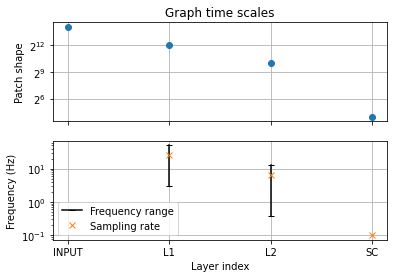

In [54]:
show_graph(dir_summary, tag, dir_output=None, save='graph.png')

In [10]:
def cluster_opt_to_pds(file_path):
    
    # ---- read in the h5py output file
    with h5py.File(file_path, 'r') as hf:
        time = hf['time'].value
        hot = hf['epoch_{:05d}'.format(epoch)]['hot'].value
    
    # ---- convert time format
    time_c = md.num2date(time)
    time_f = [UTCDateTime(t).datetime for t in time_c]
    
    # ---- conver them to a pd file
    pd_cluster = pd.DataFrame()
    pd_cluster["time"] = time_f
    pd_cluster["c_index"] = hot
    
    return pd_cluster

In [11]:
# Load cluster files
file_path = os.path.join(dir_summary, tag, 'clusters.h5')
pd_cluster = cluster_opt_to_pds(file_path)

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """
/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [12]:
from obspy.signal.tf_misfit import plot_tfr

def plot_spectrogram(file, b_time, etime, appd_secs):
    
    # ---- read wf
    tr=read(file,starttime=b_time-appd_secs,endtime=etime+10+appd_secs)
    tr=tr.detrend('demean')
    tr=tr.filter('highpass',freq=0.01)
    
    # ---- plot spectrum and spectrogram
    for i in range(len(tr)):
        plot_tfr(tr[i].data, dt=tr[i].stats.delta, fmin=0.1, 
        fmax=50, w0=8., nf=64, fft_zero_pad_fac=4)   

In [13]:
cluster_index=6
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()

index                       time  c_index
0      8 2010-04-13 21:09:33.441953        6
1     10 2010-04-13 21:09:53.921953        6
2     11 2010-04-13 21:10:04.161953        6
3     18 2010-04-13 21:11:15.841953        6
4     22 2010-04-13 21:11:56.801953        6

In [14]:
pd_cluster[(pd_cluster.time>=UTCDateTime(2010,4,13,23,55).datetime)\
           & (pd_cluster.time<=UTCDateTime(2010,4,14,1,24).datetime)][60:80]

time  c_index
1038 2010-04-14 00:05:20.641953        8
1039 2010-04-14 00:05:30.881953        8
1040 2010-04-14 00:05:41.121953        8
1041 2010-04-14 00:05:51.361953        8
1042 2010-04-14 00:06:01.601953        8
1043 2010-04-14 00:06:11.841953        7
1044 2010-04-14 00:06:22.081953        7
1045 2010-04-14 00:06:32.321953        7
1046 2010-04-14 00:06:42.561953        7
1047 2010-04-14 00:06:52.801953        8
1048 2010-04-14 00:07:03.041953        7
1049 2010-04-14 00:07:13.281953        7
1050 2010-04-14 00:07:23.521953        7
1051 2010-04-14 00:07:33.761953        7
1052 2010-04-14 00:07:44.001953        7
1053 2010-04-14 00:07:54.241953        2
1054 2010-04-14 00:08:04.481953        8
1055 2010-04-14 00:08:14.721953        7
1056 2010-04-14 00:08:24.961953        7
1057 2010-04-14 00:08:35.201953        7

In [15]:
import plotly.graph_objs as go

# ---- plot Lin's catalog
#lin_x, lin_y = make_cumus(pd_ls_catalog.time)
#fig = go.Figure(data=[go.Scatter(x=lin_x,
#                                 y=lin_y,
#                                 marker=dict(
#                                     size=pd_ls_catalog.mag**0.5*10,
#                                     color=pd_ls_catalog.dist_to_sta,
#                                     colorbar=dict(thickness=25,x=-0.15, len=0.8)
#                                 ),
#                                 text=pd_ls_catalog.dist_to_sta,
#                                 mode='lines+markers',
#                                 name='Lins')])

fig=go.Figure()

# ---- plot clusters
for i in pd.unique(pd_cluster.c_index):
    if i != -9 :
        clst_x, clst_y = make_cumus(pd_cluster[pd_cluster.c_index==i].time)
        fig.add_traces(data=[go.Scatter(x=clst_x, y=clst_y, mode='lines+markers',name=f'clst#{i}')])
    
fig.update_xaxes(rangeslider_visible=True)
fig.show()

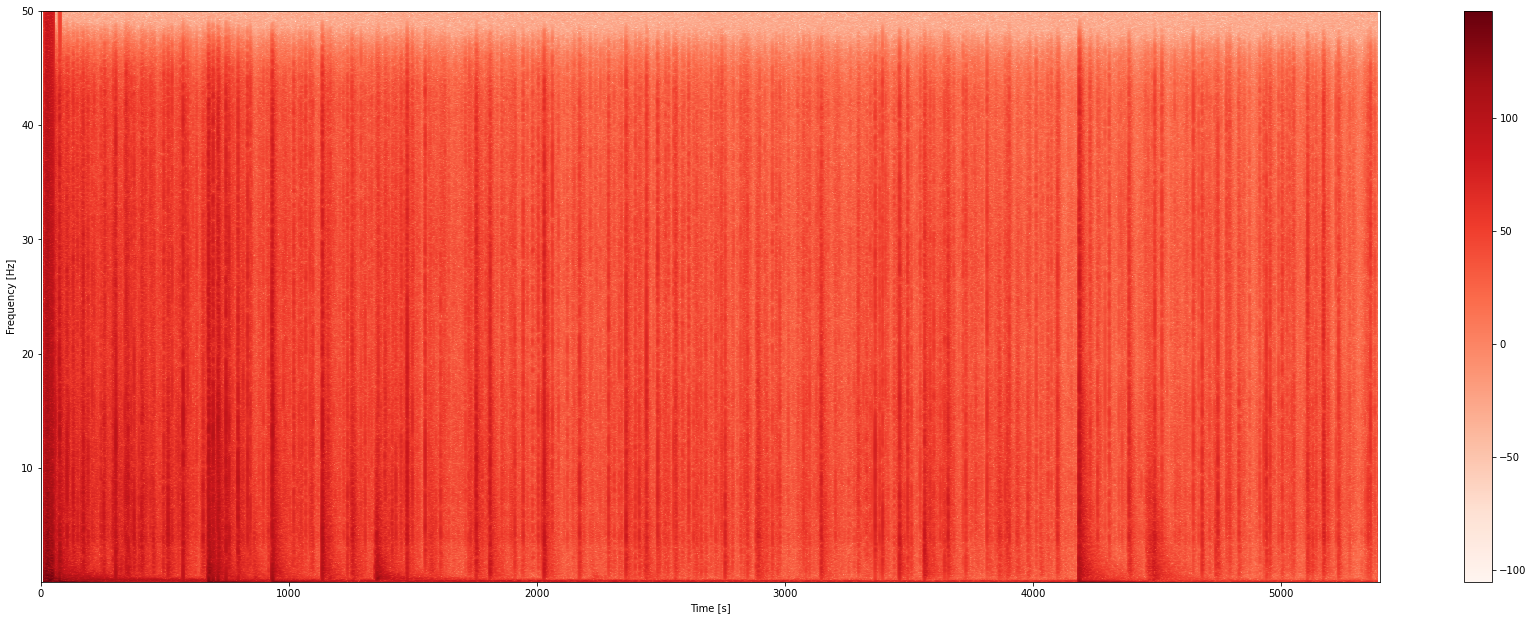

In [37]:
import matplotlib.pyplot as plt
cmap=plt.get_cmap('Reds')
wave_path = wave_path
b_time = UTCDateTime(2010,4,13,23,50)
e_time = UTCDateTime(2010,4,14,1,20)
appd_secs=30
#plot_spectrogram(wave_path, b_time, e_time, appd_secs) 
tr=read(wave_path,starttime=b_time,endtime=e_time)\
.filter('highpass',freq=0.01)
fig=spectrogram(data=tr[0].data, samp_rate=tr[0].stats.sampling_rate, log=False,dbscale=True,per_lap=0.95,wlen=20,show=False,cmap=cmap,clip=[0.99, 1])
fig.set_size_inches(30, 10.5, forward=True)
fig.show()

In [110]:
fig.colorbar(im, cax=cax, orientation='horizontal')

NameError: name 'im' is not defined

In [ ]:
wave_path = wave_path
b_time = UTCDateTime(2010,4,14,2)
e_time = UTCDateTime(2010,4,14,5)
appd_secs=30
#plot_spectrogram(wave_path, b_time, e_time, appd_secs) 
tr=read(wave_path,starttime=b_time,endtime=e_time)\
.filter('highpass',freq=1)
fig=tr[0].spectrogram(log=True,dbscale=False,per_lap=0.95,wlen=10,show=False)
fig.set_size_inches(30, 10.5, forward=True)
fig.show()

In [ ]:
wave_path = wave_path
b_time = UTCDateTime(2010,4,14,5)
e_time = UTCDateTime(2010,4,14,8)
appd_secs=30
#plot_spectrogram(wave_path, b_time, e_time, appd_secs) 
tr=read(wave_path,starttime=b_time,endtime=e_time)\
.filter('highpass',freq=1)
fig=tr[0].spectrogram(log=True,dbscale=False,per_lap=0.95,wlen=10,show=False)
fig.set_size_inches(30, 10.5, forward=True)
fig.show()

### Landslide classified as landslide (cluster 2)

In [ ]:
cluster_index=6
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



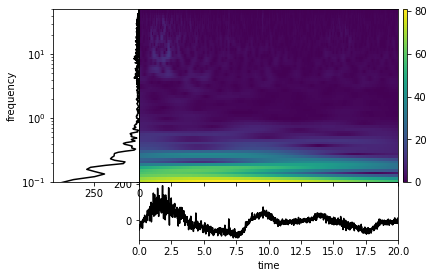

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



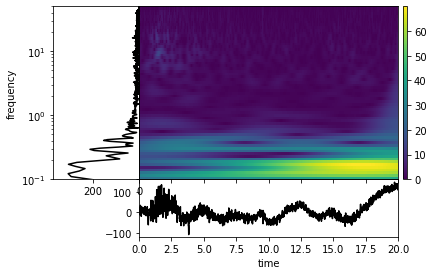

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



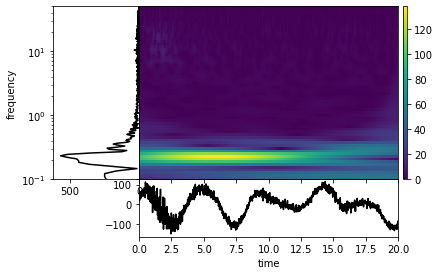

In [89]:
cluster_index=6
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[0].time)
e_time = UTCDateTime(spec_cluster.iloc[0].time)
appd_secs=5
plot_spectrogram(wave_path, b_time, e_time, appd_secs)

In [ ]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[0].time)
e_time = UTCDateTime(spec_cluster.iloc[0].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

In [ ]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[2].time)
e_time = UTCDateTime(spec_cluster.iloc[2].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### classified as landslide (cluster 2) but not in Lin's catalog

In [ ]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[12].time)
e_time = UTCDateTime(spec_cluster.iloc[13].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs)  

In [ ]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[16].time)
e_time = UTCDateTime(spec_cluster.iloc[17].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### Landslide classified as EQ 

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[18].time)
e_time = UTCDateTime(spec_cluster.iloc[21].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[14].time)
e_time = UTCDateTime(spec_cluster.iloc[14].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[12].time)
e_time = UTCDateTime(spec_cluster.iloc[12].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### Earthquake classified as earthquake (cluster 1)

In [ ]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[1].time)
e_time = UTCDateTime(spec_cluster.iloc[1].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 